<h1><center> Sentiment Analysis </center></h1>
<img src=https://www.whichemoji.co.uk/wp-content/uploads/2019/06/scatteremojis-10.png style="width: 300px;"/>

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [13]:
person_comments_sentiment = pd.read_pickle('person_comments_grouped.pkl')
person_comments_sentiment.head()

,Person,Comments
0,Danielle Cohn,Disgusting So u 13 and you had a first time Th...
1,Emily Ann Shaheen,Im Arab from iraq but my golden name is in eng...
2,Madeline & Eric,Your grocery carts are sooo small. Ours look g...
3,Madison Beer,Be strong That's my fav song of demi lovato I'...
4,Rebecca Black,My old girlfriend also had a book titled Knot ...


#### Polarity and Subjectivity

Polarity tells us how much positive or negative connotation a sentence or group of sentence has. It ranges between -1 to 1 where 1 is a super positive sentence while -1 otherwise.

Subjectivity tells us if a sentence states a fact or opinion. It ranges from 0 to 1. 0 is where a sentence or group of sentence is factual while 1 is highly opinionated.

We apply these methodologies in the comments each of these subjects received and analyze what they could possibly mean.

In [14]:
# Finding polarity and subjectivity of overall comments for each uploaders

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

person_comments_sentiment['polarity'] = person_comments_sentiment['Comments'].apply(pol)
person_comments_sentiment['subjectivity'] = person_comments_sentiment['Comments'].apply(sub)
person_comments_sentiment

,Person,Comments,polarity,subjectivity
0,Danielle Cohn,Disgusting So u 13 and you had a first time Th...,-0.034720,0.568526
1,Emily Ann Shaheen,Im Arab from iraq but my golden name is in eng...,0.272785,0.552532
2,Madeline & Eric,Your grocery carts are sooo small. Ours look g...,0.301795,0.613370
3,Madison Beer,Be strong That's my fav song of demi lovato I'...,0.255257,0.674799
4,Rebecca Black,My old girlfriend also had a book titled Knot ...,0.243381,0.578674
5,Richard Gale,Hes a bitch Richard your a n idiot mate He bul...,-0.114670,0.563138
6,Shannon Beveridge,My ex broke up with me because she wanted to b...,0.145690,0.585043
7,Steven Assanti,"Steven is a Sagittarius, we be great is my guy...",-0.032465,0.590166


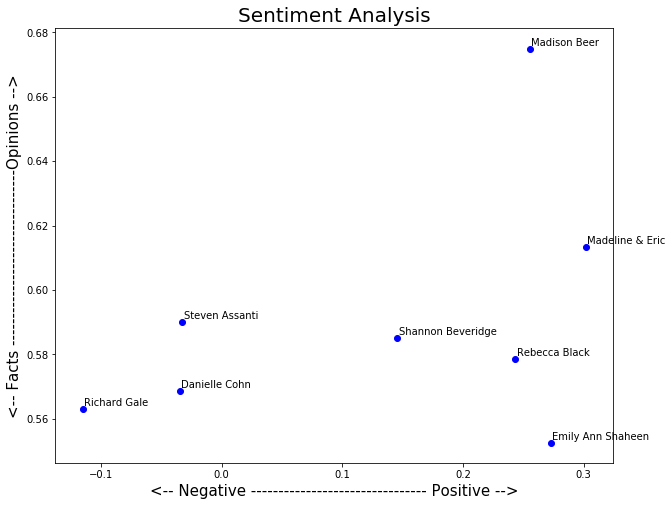

In [15]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, uploader in enumerate(person_comments_sentiment.index):
    x = person_comments_sentiment.polarity.loc[uploader]
    y = person_comments_sentiment.subjectivity.loc[uploader]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, person_comments_sentiment['Person'][index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------------------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts --------------------------------Opinions -->', fontsize=15)

plt.show()

**Insights**

From the chart we can infer that:
* Madison Beer gets more opinionated positive comments. She is a singer, so it is obvious for her to get opinions at her singing.

* Emily Ann gets positive but factual comments. She gets comments mostly about her Arabic heritage. It is good to know that she does not get much xenophobic comments.

* Madeline and Eric get mostly positive and fairly opinionated comments. They are independent teen parents blogging their livelihood. Most people find it commendable. 

* Rebecca Black who used to be heavily bullied for her Friday song now receives factual and positive comments. Though, most of the words in comments of her new video still refer to the 'Friday' song, she is admired for her persistence in singing career.

* Steven Assanti and Danielle Cohn gets more negative comments than above individuals. Steven gets more opinionated comments than Dani. The reason could be he is obese and bit rebellious towards comments on his obesity which generates worse comments. Danielle on other hand is a teenager who displays her odd choices of life in social media.


* Richard Gale videos gets the worst comments. They are also factual comments. He was a bully who started fight with his class mate. But it is disheartening to see a minor being commented harshly in social media. There should be some moral policing around this.

**Final Words**

Looking at all previous comparisons, I find Richard Gale and Steven Assanti are worse victims of cyber-bullying. Since Richard was/is a minor, we do not want him to take wrong steps because of such negative impact. I would contact YouTube administrators or cyber police to ban comments on his videos as first measure.
